# Predicting stroke using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not a patient is likely to get stroke?

## 2. Data

The dataset we are using came from kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient is likely to get stroke during the proof of concept, we'll purse the project.

## 4. Features

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**

**Target**
* stroke: 1 if the patient had a stroke or 0 if not

# 5. Modelling

In [1]:
# Importing all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want plots to appear in our notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become the subject matter expert on the dataset you're working with.

1. What questions are you trying to solve.
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# How many each class are there
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

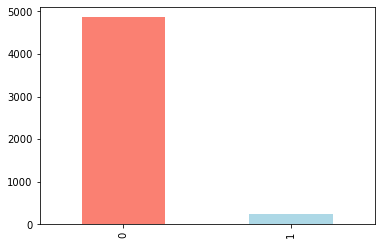

In [7]:
df["stroke"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# stroke frequency according to sex
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
# Compare stroke column with sex column
pd.crosstab(df.stroke, df.gender) # usually you can compare target with other features to start getting intuetion about data.

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


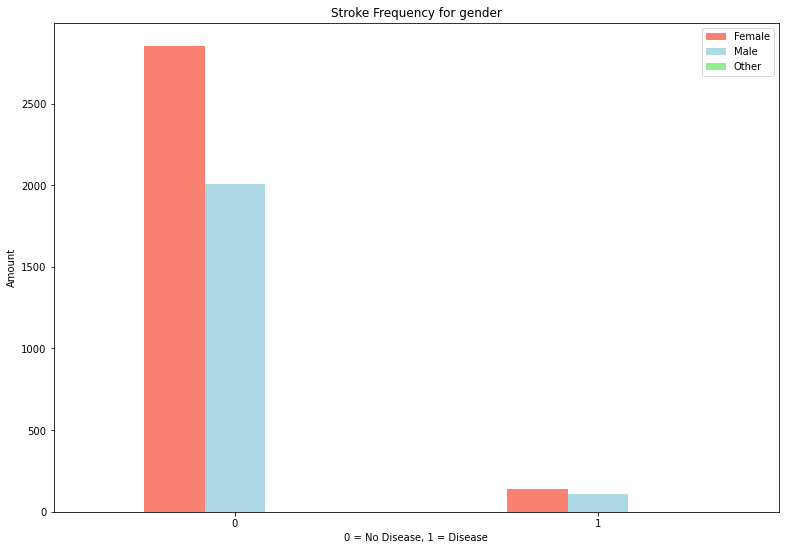

In [13]:
pd.crosstab(df.stroke, df.gender).plot(kind="bar", 
                                    figsize=(13, 9), 
                                    color=["salmon", "lightblue", 'lightgreen'])

plt.title("Stroke Frequency for gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male", "Other"])
plt.xticks(rotation=0);

So, what will be the risk factor for stroke?

I found one article in which there are some factors which would play major role in predicting weather or not omeone will have a storke

Link to the resource: https://www.hopkinsmedicine.org/health/conditions-and-diseases/stroke/risk-factors-for-stroke

Based on this article we will compare age with glucose level.....

**Age vs Glucose Levels for Stroke**

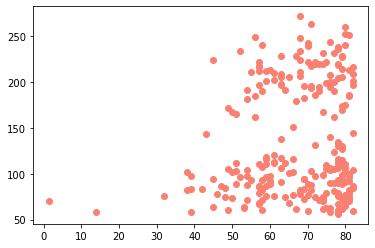

In [14]:
# Scatter with positive examples
plt.scatter(df.age[df.stroke == 1],
            df.avg_glucose_level[df.stroke ==1],
            c="salmon")

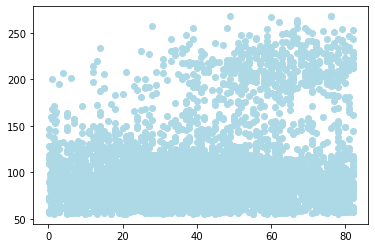

In [15]:
# Scatter with negative examples
plt.scatter(df.age[df.stroke == 0],
            df.avg_glucose_level[df.stroke == 0],
            c="lightblue")

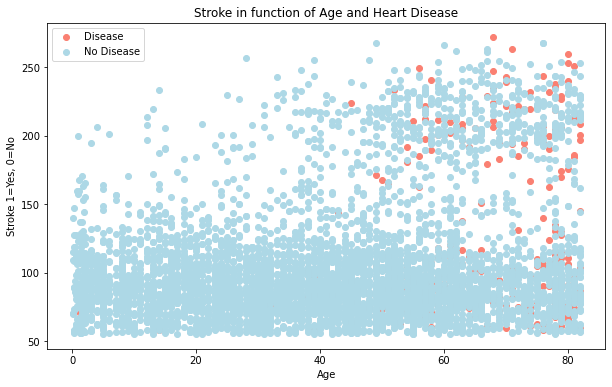

In [16]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.stroke == 1],
            df.avg_glucose_level[df.stroke ==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.stroke == 0],
            df.avg_glucose_level[df.stroke == 0],
            c="lightblue")

# Add some more info
plt.title("Stroke in function of Age and Heart Disease")
plt.xlabel("Age")
plt.ylabel("Stroke 1=Yes, 0=No")
plt.legend(["Disease", "No Disease"]);

Our dataset is highly imbalanced....

Filling missing values

In [17]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
# Split the data into X and y
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [19]:
# Filling missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill the BMI values with numerical values
bmi_imputer = SimpleImputer(strategy="mean")

# Define columns
bmi_features = ["bmi"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("bmi_imputer", bmi_imputer, bmi_features)
])

#Transform the data
transformed_data = imputer.fit_transform(X)
transformed_data

array([[36.6       ],
       [28.89323691],
       [32.5       ],
       ...,
       [30.6       ],
       [25.6       ],
       [26.2       ]])

In [20]:
# df_filled = pd.DataFrame(transformed_data,
#                          columns=["id", "gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"])
# df_filled

In [21]:
# Creating a copy of our data frame
# df_filled = df
df["bmi_filled"] = transformed_data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
bmi_filled             0
dtype: int64

In [22]:
df.drop("bmi", axis=1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_filled
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.893237
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.000000
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.600000
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.600000


In [23]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'bmi_filled']

In [24]:
# Rearranging the order of columns
df = df[['id', 'gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi_filled', 'smoking_status', 'stroke']]
df.rename(columns={"bmi_filled": "bmi"}, inplace=True) # Renaming the bmi_filled column to bmi
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Let's check out the corelation matrix

In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [26]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


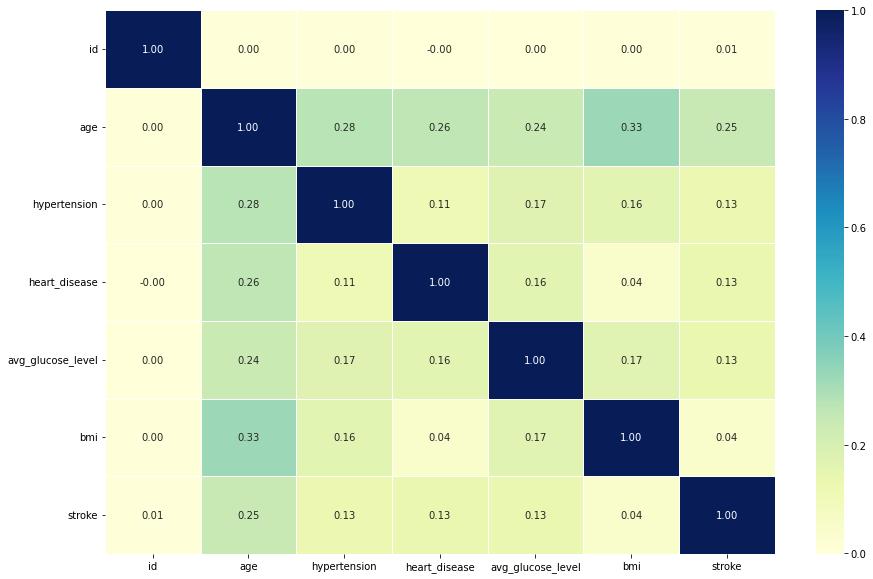

In [27]:
# Lets make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

**Building a model**

Performing One Hot encoding to convert dataset to numerical features

In [28]:
# Converting data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([
    ("one_hot", one_hot, categorical_features)
], remainder="passthrough")

#Transform the data
transformed_X = transformer.fit_transform(df)
transformed_X

array([[  0.        ,   1.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  1.        ,   0.        ,   0.        , ..., 202.21      ,
         28.89323691,   1.        ],
       [  0.        ,   1.        ,   0.        , ..., 105.92      ,
         32.5       ,   1.        ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,  82.99      ,
         30.6       ,   0.        ],
       [  0.        ,   1.        ,   0.        , ..., 166.29      ,
         25.6       ,   0.        ],
       [  1.        ,   0.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [29]:
np.random.seed(42)
# Split the data into X and y
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}


# Create a function to fit and score models
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluaties given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test lables
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary with model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [31]:
model_scores = fit_and_score(model=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\codes\ml_exp\stroke-prediction-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.949119373776908,
 'KNN': 0.9393346379647749,
 'Random Forest Classifier': 1.0}

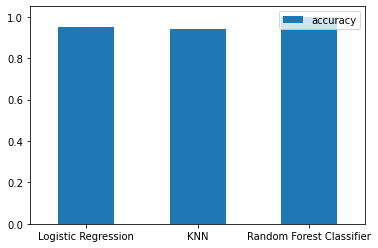

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0);

In [33]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier
accuracy,0.949119,0.939335,1.0


Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next model steps off. What we should do?

Lets look at the foolowing:

* important in any ml model
    * Hyper parameter tuning
    * Feature importance
    
* Specific to classification model
    * Confusion matrix
    * Cross-validation
    * Precision
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * Area under the curve (AUC)
    
### Hyper parameter tuning ( by hand )

In [34]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instances
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Updating the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Updating the testing list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.9564579256360078,
 0.9567025440313112,
 0.9545009784735812,
 0.9547455968688845,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779]

In [36]:
test_scores

[0.9099804305283757,
 0.9393346379647749,
 0.9403131115459883,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749]

Maximum KNN score on the test data: 94.03%


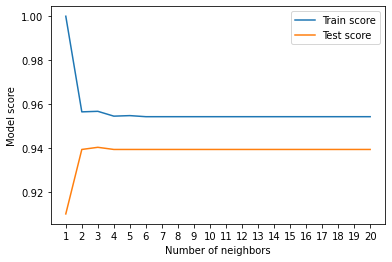

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyper parameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [39]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=25,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\codes\ml_exp\stroke-prediction-project\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=25. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

best param is: 

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 1500,
 'C': 0.00018873918221350977}

score 1:1.0

In [41]:
rs_log_reg.score(X_test, y_test)

0.9990215264187867

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [42]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [44]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

### Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [45]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9853228962818004

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
*Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions...

In [48]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

C:\codes\ml_exp\stroke-prediction-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


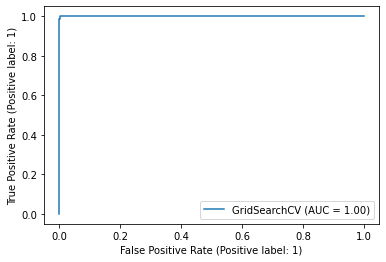

In [49]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

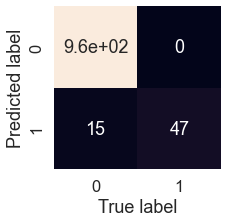

In [50]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       1.00      0.76      0.86        62

    accuracy                           0.99      1022
   macro avg       0.99      0.88      0.93      1022
weighted avg       0.99      0.99      0.98      1022



**Calculate evaluation metrics using cross-validation**

In [52]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [53]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [54]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,9046.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,18234.0,80.0,1.0,0.0,83.75,28.893237,0.0
5106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,44873.0,81.0,0.0,0.0,125.20,40.000000,0.0
5107,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,19723.0,35.0,0.0,0.0,82.99,30.600000,0.0
5108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,37544.0,51.0,0.0,0.0,166.29,25.600000,0.0


In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([1.        , 0.99706458, 0.99804305, 0.99902153, 0.9853229 ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9958904109589042

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

1.0

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9147755102040817

In [59]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9515680200031745

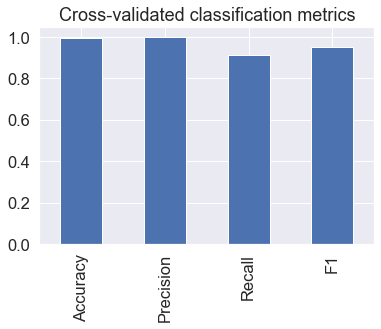

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

**Feature Importance**

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [61]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[-4.57855862e-01, -2.59998543e-01,  0.00000000e+00,
        -4.40450775e-01, -2.77403630e-01, -1.17791076e-01,
        -1.07677989e-02, -1.56467345e-01, -1.39791012e-01,
        -2.93037172e-01, -3.60932312e-01, -3.56922092e-01,
        -3.81812212e-01, -4.76512652e-02, -2.60078725e-01,
        -2.83122018e-02, -7.56581210e-06,  2.66148941e-02,
         3.23595761e-01,  2.27279114e-01,  1.12814057e-03,
        -9.57531693e-02,  3.35397978e+00]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'id': -0.45785586156631514,
 'gender': -0.2599985428424374,
 'age': 0.0,
 'hypertension': -0.44045077483892847,
 'heart_disease': -0.2774036295698268,
 'ever_married': -0.11779107600090148,
 'work_type': -0.010767798912290521,
 'Residence_type': -0.15646734491184908,
 'avg_glucose_level': -0.13979101222864668,
 'bmi': -0.2930371723550642,
 'smoking_status': -0.3609323119707064,
 'stroke': -0.3569220924380455}

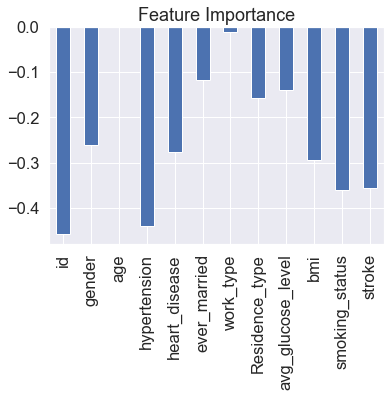

In [64]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);